# Assignment 6: Implement SGD for linear regression

**The Boston Housing Dataset**

A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass.

*This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. 
**The dataset is small in size with only 506 cases***

**Dataset Naming**
The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

**Dataset Information**

* **Origin**
        The origin of the boston housing data is Natural.
* **Usage**
        This dataset may be used for Assessment.
* **Number of Cases**
        The dataset contains a total of 506 cases.
* **Order**
        The order of the cases is mysterious.
* **Variables**
        There are 14 attributes in each case of the dataset. They are:
            CRIM - per capita crime rate by town
            ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
            INDUS - proportion of non-retail business acres per town.
            CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
            NOX - nitric oxides concentration (parts per 10 million)
            RM - average number of rooms per dwelling
            AGE - proportion of owner-occupied units built prior to 1940
            DIS - weighted distances to five Boston employment centres
            RAD - index of accessibility to radial highways
            TAX - full-value property-tax rate per 10,000dollars
            PTRATIO - pupil-teacher ratio by town
            B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
            LSTAT - percent lower status of the population
            MEDV - Median value of owner-occupied homes in $1000's


***Importing the necessary libraries***

In [50]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split

***Loading the dataset***

In [51]:
boston = load_boston()
X = pd.DataFrame(boston.data)
Y = np.array(boston.target)

output_df = pd.DataFrame(columns=['Algorithm', 'Learning Rate', 'N-Iteration', 'M.S.E'])
n_iter_range = [10**i for i in range(0, 6)]

**Splitting the dataset with 70-30 train-test ratio**

In [52]:
XTrain, XTest, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0, shuffle=True)

***Standardizing the dataset***

In [53]:
# Standardizing the dataset with mean centering and variance scaling
sc = StandardScaler()
#Fitting and transforming the training dataset
x_train = sc.fit_transform(XTrain)
#Transforming the testing dataset
x_test = sc.transform(XTest)

## **SGD Regressor with Learning Rate : 0.01**

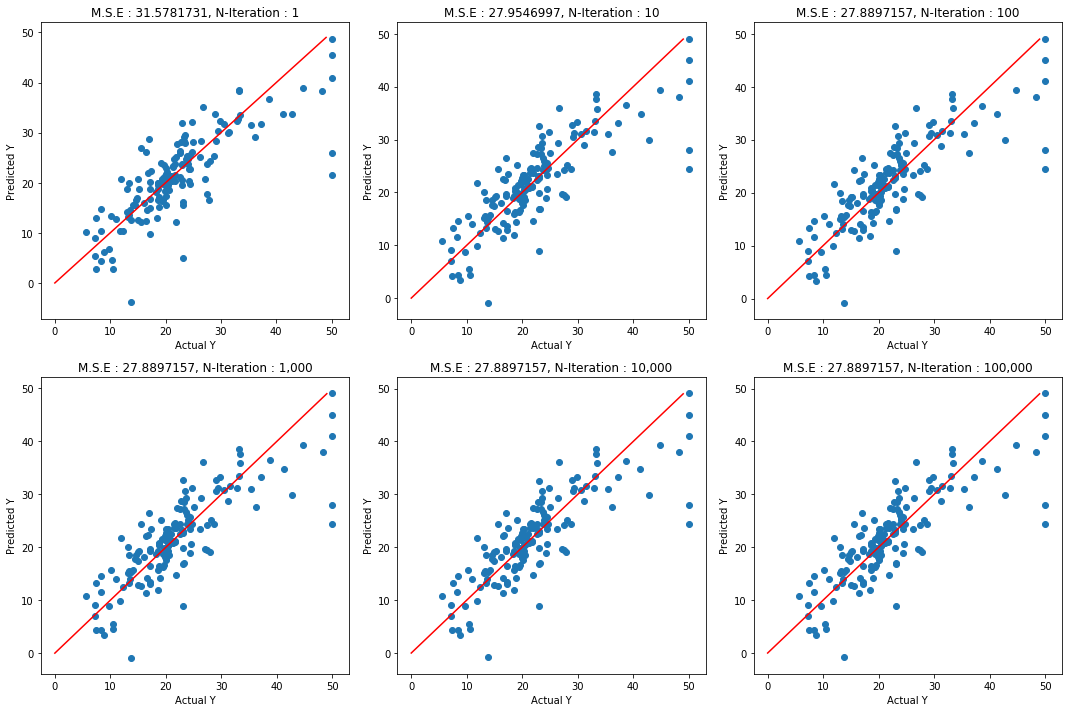

In [54]:
f, axarr = plt.subplots(2, 3, figsize=(15,10))
save_sgd_df = pd.DataFrame(columns=['Algorithm', 'Learning Rate','N-Iteration', 'M.S.E'])
for index, ite in enumerate(n_iter_range):
    clf = SGDRegressor(penalty='none', learning_rate='constant', eta0=0.01, shuffle=False, n_iter=ite)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    save_sgd_df = save_sgd_df.append({'Algorithm': 'SGDRegressor', 'Learning Rate': 0.01,'N-Iteration':ite, 'M.S.E': mse}, ignore_index=True)
    axarr[int(index/3), int(index%3)].plot(np.arange(50), np.arange(50), color='r')
    axarr[int(index/3), int(index%3)].scatter(y_test, y_pred)
    axarr[int(index/3), int(index%3)].set_xlabel ('Actual Y')
    axarr[int(index/3), int(index%3)].set_ylabel ('Predicted Y')
    axarr[int(index/3), int(index%3)].set_title('M.S.E : {0:.7f}'.format(mse) +  ', N-Iteration : {:,}'.format(ite))
    plt.tight_layout()
    plt.grid()
plt.show()


_Plotting the N-Iterations vs M.S.E for SGDRegressor Algorithm_

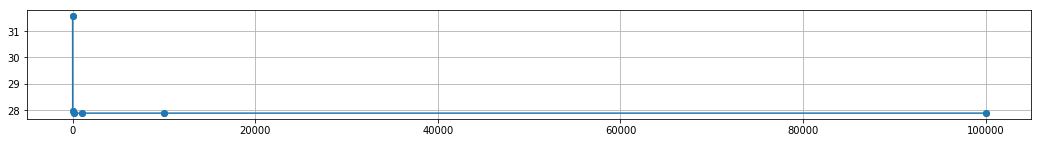

In [55]:
plt.figure(figsize=(18,2))
plt.scatter(save_sgd_df['N-Iteration'], save_sgd_df['M.S.E'])
plt.plot(save_sgd_df['N-Iteration'], save_sgd_df['M.S.E'], '-o')
plt.grid()
plt.show()

_Printing the Weight Vector for SGD Regressor_

In [56]:
sgd_op_w = pd.DataFrame(clf.coef_).T
sgd_op_w.index = ['SGDRegressor']
sgd_op_w

,0,1,2,3,4,5,6,7,8,9,10,11,12
SGDRegressor,-1.191457,1.241887,0.269344,1.286084,-1.871315,3.039862,-0.139336,-3.418594,2.470299,-1.982521,-2.657993,0.787101,-3.644444


## Implementing SDG Regressor with learning rate : 0.01 from scratch

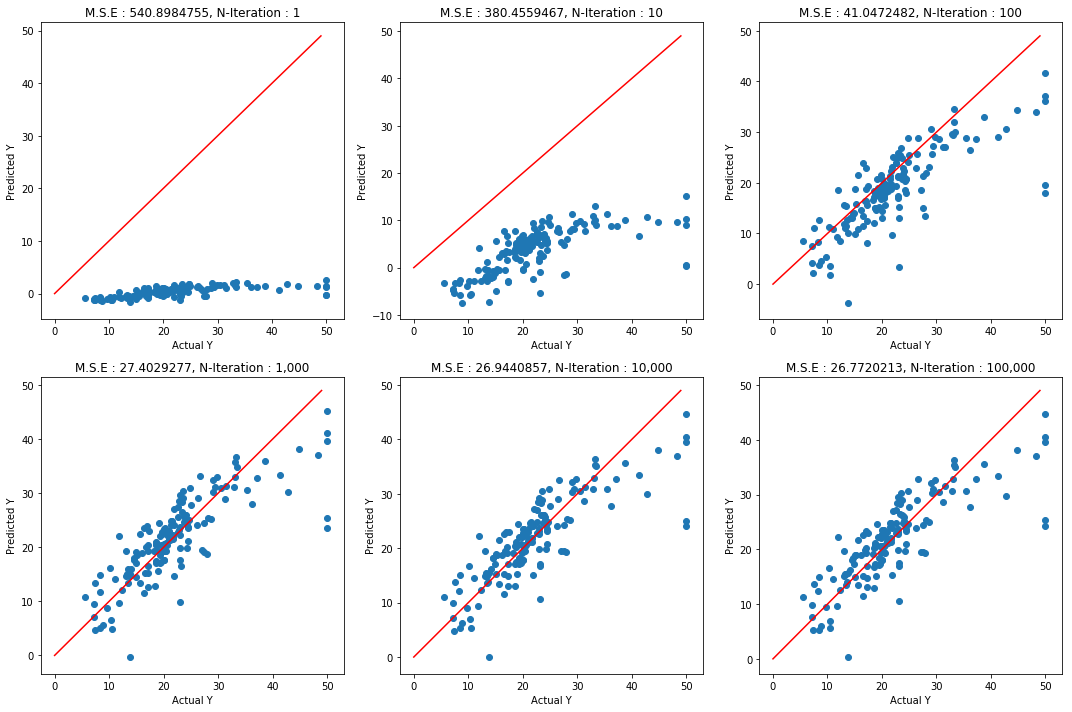

In [57]:
plt.close()
f, axarr = plt.subplots(2, 3, figsize=(15,10))

learning_rate = 0.01
N = x_train.shape[0]
features = x_train.shape[1]

save_mnlsgd_df = pd.DataFrame(columns=['Algorithm', 'Learning Rate','N-Iteration', 'M.S.E'])
#Selecting the batch size for SGD to be constant as 50% of training dataset
k = int(0.5 * N)

for index,ite in enumerate(n_iter_range):
    #Randomly selecting the gradient_w vector from the data itself
    w_optimal = np.zeros(shape=(features,))
    #Selecting Intercept term as 0 
    b_optimal = 0
    
    for it in np.arange(ite):
        res_w = np.zeros((features,))
        res_b = 0
        batch_li = np.array([random.randint(1, N-1) for _ in range(k)])
        for i in batch_li:
            y_pred = np.dot(w_optimal, x_train[i]) + b_optimal
            err = y_train[i] - y_pred
            res_w =  np.array(res_w + (err * x_train[i]), dtype=np.float64)
            res_b =  res_b + err
        grad_w = (-2 / k) * res_w
        grad_b = (-2 / k) * res_b
        w_optimal = w_optimal - (learning_rate * grad_w)
        b_optimal = b_optimal - (learning_rate * grad_b)

    y_pred_ = []
    for i in range(len(x_test)):
        y=np.asscalar(np.dot(w_optimal,x_test[i]) + b_optimal)
        y_pred_.append(y)
    mse = mean_squared_error(y_test, y_pred_)
    save_mnlsgd_df = save_mnlsgd_df.append({'Algorithm': 'Manual SGD', 'Learning Rate': 0.01,'N-Iteration':ite, 'M.S.E': mse}, ignore_index=True)
    axarr[int(index/3), int(index%3)].plot(np.arange(50), np.arange(50), color='r')
    axarr[int(index/3), int(index%3)].scatter(y_test, y_pred_)
    axarr[int(index/3), int(index%3)].set_xlabel ('Actual Y')
    axarr[int(index/3), int(index%3)].set_ylabel ('Predicted Y')
    axarr[int(index/3), int(index%3)].set_title('M.S.E : {0:.7f}'.format(mse) +  ', N-Iteration : {:,}'.format(ite))
    plt.tight_layout()
    plt.grid()
plt.show()


_Plotting the N-Iterations vs M.S.E for ManualSGD Algorithm_

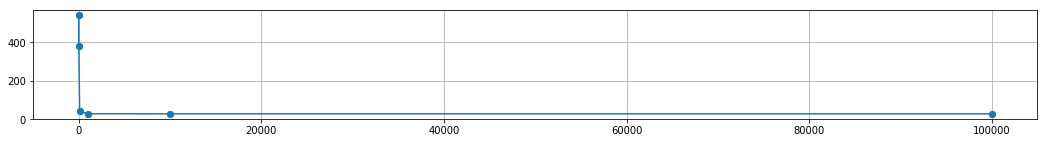

In [58]:
plt.figure(figsize=(18,2))
plt.scatter(save_mnlsgd_df['N-Iteration'], save_mnlsgd_df['M.S.E'])
plt.plot(save_mnlsgd_df['N-Iteration'], save_mnlsgd_df['M.S.E'], '-o')
plt.grid()
plt.show()

_Printing the Weight Vector for Manual/Scratch SGD Regressor_

In [59]:
man_sgd_op_w = pd.DataFrame(w_optimal).T
man_sgd_op_w.index = ['Manual-SGD']
man_sgd_op_w

,0,1,2,3,4,5,6,7,8,9,10,11,12
Manual-SGD,-0.955591,1.010319,0.080567,0.642676,-1.800255,2.662878,-0.224925,-3.115612,2.213754,-1.886661,-2.261027,0.612757,-3.651006


In [60]:
out_resp = pd.DataFrame(columns=['Algorithm', 'Learning Rate','N-Iteration', 'M.S.E'])
for i in range(6):
    out_resp = out_resp.append(save_sgd_df.iloc[i])
    out_resp = out_resp.append(save_mnlsgd_df.iloc[i])
    
#Reporting the weight vector result
w_out_resp = pd.concat([sgd_op_w, man_sgd_op_w])

## **Results**

**_Checking the Weight Vector for both algorithm implementation_**

In [61]:
w_out_resp

,0,1,2,3,4,5,6,7,8,9,10,11,12
SGDRegressor,-1.191457,1.241887,0.269344,1.286084,-1.871315,3.039862,-0.139336,-3.418594,2.470299,-1.982521,-2.657993,0.787101,-3.644444
Manual-SGD,-0.955591,1.010319,0.080567,0.642676,-1.800255,2.662878,-0.224925,-3.115612,2.213754,-1.886661,-2.261027,0.612757,-3.651006


**_Checking the MeanSquaredError (M.S.E) for both algorithm implementations for all N-Iterations_**

In [62]:
out_resp

,Algorithm,Learning Rate,N-Iteration,M.S.E
0,SGDRegressor,0.01,1,31.578173
0,Manual SGD,0.01,1,540.898476
1,SGDRegressor,0.01,10,27.954700
1,Manual SGD,0.01,10,380.455947
2,SGDRegressor,0.01,100,27.889716
2,Manual SGD,0.01,100,41.047248
3,SGDRegressor,0.01,1000,27.889716
3,Manual SGD,0.01,1000,27.402928
4,SGDRegressor,0.01,10000,27.889716
4,Manual SGD,0.01,10000,26.944086


## **Conclusion**

* As the number of iterations for the manual/scratch SGD regressor algorithm is increasing, the Mean Squared Error (M.S.E) decreases.
* At nearly 1k iterations, our manual/scratch SGD Regressor algorithm MSE value becomes significantly equal to the SGDRegressor algorithm.
* We can see that our manual/scratch SGD Regressor algorithm performs well and is implemented correctly.